In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

import plotly as py
import plotly.graph_objs as go

#Tutorial can be found here: https://www.youtube.com/watch?v=CIfZi0niNE0

In [52]:
dataset = pd.read_csv('CoffeeBeansCleaned.csv')
dataset.drop(columns = ['Shape'])

,Variety,Sieve,Aroma,Flavor,Aftertaste,Acidity,Body,Uniformity,Balance,clean cup,Sweetness,Taster´s score,Final score
0,CO,13,6.50,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.00,72.50
1,CO,13,6.00,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.00,72.00
2,CO,13,6.75,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.00,72.75
3,CO,13,6.75,6.50,6.50,6.00,6.00,10.0,6.00,10,10,6.00,73.75
4,CO,13,6.75,6.25,6.25,6.25,6.50,10.0,6.50,10,10,6.50,75.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,OA,18,6.50,6.00,6.00,6.00,6.25,10.0,6.00,10,10,6.00,72.75
178,OA,18,6.00,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.25,72.25
179,OA,18,6.00,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.50,72.50
180,OA,18,6.25,6.25,6.25,6.00,6.25,10.0,6.00,10,10,6.25,73.25


In [53]:
X = dataset

In [54]:
ct = ColumnTransformer(transformers = [("encoder",OneHotEncoder(),[0,1])], remainder="passthrough")
X_train = np.array(ct.fit_transform(X))

In [55]:
#WSS
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ct.fit_transform(X))
    sum_of_squared_distances.append(km.inertia_)

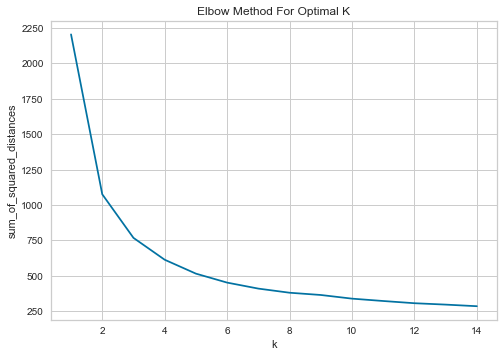

In [56]:
#Plotting
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()

In [57]:
X_train = np.array(ct.fit_transform(X))

In [58]:
#Clustering
km = KMeans(n_clusters = 4, init="k-means++", random_state=42)
y_means = km.fit(X_train)

In [59]:
y_means

KMeans(n_clusters=4, random_state=42)

In [60]:
#Centroids
y_means.cluster_centers_

array([[ 4.69387755e-01,  3.87755102e-01,  1.42857143e-01,
         7.34693878e-01,  2.65306122e-01,  6.93889390e-18,
         1.48775510e+01,  6.80612245e+00,  6.60714286e+00,
         6.46428571e+00,  6.42346939e+00,  6.37244898e+00,
         1.00000000e+01,  6.43877551e+00,  1.00000000e+01,
         1.00000000e+01,  6.46428571e+00,  7.55459184e+01],
       [ 3.65853659e-01,  3.65853659e-01,  2.68292683e-01,
         3.90243902e-01,  5.85365854e-01,  2.43902439e-02,
         1.45853659e+01,  7.16463415e+00,  7.06097561e+00,
         6.98780488e+00,  7.07317073e+00,  6.98170732e+00,
         1.00000000e+01,  7.01219512e+00,  1.00000000e+01,
         1.00000000e+01,  7.10365854e+00,  7.93841463e+01],
       [ 1.57894737e-01,  4.03508772e-01,  4.38596491e-01,
         1.00000000e+00, -5.55111512e-17,  2.77555756e-17,
         1.70877193e+01,  6.41245614e+00,  6.16228070e+00,
         6.10087719e+00,  6.08771930e+00,  6.11842105e+00,
         1.00000000e+01,  6.15350877e+00,  1.00000000e

In [61]:
#Check where each record resides in which cluster
km.labels_

array([3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 0, 1, 1, 1, 3, 1,
       3, 3, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       3, 3, 0, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 3,
       1, 0, 3, 1, 1, 0, 1, 3, 0, 3, 3, 3, 0, 3, 1, 1, 3, 0, 3, 2, 2, 2,
       0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

In [62]:
#Count how many records are in each of the clusters
labels = km.labels_
clusterCount = np.bincount(labels)
clusterCount

array([49, 41, 57, 35])

In [63]:
#List the records in dataframe form
df_with_shape_column = pd.read_csv('CoffeeBeansCleaned.csv')

cluster = km.labels_
df_with_shape_column['cluster'] = cluster

df_with_shape_column

,Variety,Shape,Sieve,Aroma,Flavor,Aftertaste,Acidity,Body,Uniformity,Balance,clean cup,Sweetness,Taster´s score,Final score,cluster
0,CO,PE,13,6.50,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.00,72.50,3
1,CO,PE,13,6.00,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.00,72.00,3
2,CO,PE,13,6.75,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.00,72.75,3
3,CO,PE,13,6.75,6.50,6.50,6.00,6.00,10.0,6.00,10,10,6.00,73.75,3
4,CO,MI,13,6.75,6.25,6.25,6.25,6.50,10.0,6.50,10,10,6.50,75.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,OA,FL,18,6.50,6.00,6.00,6.00,6.25,10.0,6.00,10,10,6.00,72.75,2
178,OA,FL,18,6.00,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.25,72.25,2
179,OA,FL,18,6.00,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.50,72.50,2
180,OA,FL,18,6.25,6.25,6.25,6.00,6.25,10.0,6.00,10,10,6.25,73.25,2


In [64]:
#List the elements of cluster n method
def display(fullList, clusternum):
    new_list = []
    for x in list_with_clusters:
        for y in x:
            if x[14] == clusternum:
                new_list.append(x)
                break
    unique_df = pd.DataFrame(new_list)
    return unique_df

In [65]:
list_with_clusters = df_with_shape_column.values.tolist()

#List elements of cluster 0
df_n = display(list_with_clusters, 0)
df_n

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,CO,MI,13,6.50,6.50,6.25,6.25,6.50,10.0,6.75,10,10,6.75,75.50,0
1,CO,MI,13,7.50,6.50,6.75,6.50,6.50,10.0,6.50,10,10,6.50,76.75,0
2,CO,MI,14,7.00,6.50,6.50,6.50,6.25,10.0,6.50,10,10,6.25,75.50,0
3,CO,FL,13,6.75,6.75,6.50,6.50,6.50,10.0,6.75,10,10,6.75,76.50,0
4,CO,FL,13,7.25,6.50,6.50,7.00,6.75,10.0,6.50,10,10,6.50,77.00,0
5,CO,FL,13,7.25,6.50,6.50,7.00,6.75,10.0,6.50,10,10,6.50,77.00,0
6,CO,FL,14,6.75,6.75,6.75,6.50,6.50,10.0,6.50,10,10,6.50,76.25,0
7,CO,FL,14,6.75,6.75,6.75,6.75,6.00,10.0,6.00,10,10,6.50,75.50,0
8,CO,FL,15,6.50,6.50,6.25,6.25,6.25,10.0,6.25,10,10,6.25,74.25,0
9,CO,FL,15,6.50,6.50,6.25,6.25,6.25,10.0,6.25,10,10,6.25,74.25,0


In [66]:
#List elements of cluster 1
df_nplus1 = display(list_with_clusters, 1)
df_nplus1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,CO,MI,14,7.00,7.00,7.25,7.25,7.00,10.0,7.00,10,10,7.25,79.75,1
1,CO,MI,14,7.75,7.25,7.25,7.25,7.00,10.0,7.00,10,10,7.25,80.75,1
2,CO,MI,14,7.50,7.00,7.00,7.00,6.50,10.0,7.25,10,10,7.25,79.50,1
3,CO,MI,15,7.00,7.00,7.00,6.75,7.00,10.0,6.75,10,10,6.75,78.25,1
4,CO,MI,15,7.25,7.25,7.00,7.00,6.75,10.0,7.25,10,10,7.00,79.50,1
5,CO,FL,13,7.00,7.00,7.00,7.25,7.00,10.0,7.00,10,10,7.00,79.25,1
6,CO,FL,13,7.50,7.25,7.50,7.25,7.25,10.0,7.25,10,10,7.25,81.25,1
7,CO,FL,13,7.00,7.00,7.00,7.00,6.50,10.0,7.00,10,10,7.00,78.50,1
8,CO,FL,16,7.00,7.25,7.25,7.25,7.25,10.0,7.25,10,10,7.50,80.75,1
9,CO,FL,16,7.25,7.25,6.75,7.00,7.00,10.0,6.50,10,10,6.75,78.50,1


In [67]:
#List elements of cluster 2
df_nplus2 = display(list_with_clusters, 2)
df_nplus2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,CO,FL,16,6.25,6.00,6.00,6.25,6.00,10.0,6.25,10,10,6.25,73.00,2
1,CO,FL,16,6.00,6.00,6.25,6.00,6.00,10.0,6.00,10,10,6.50,72.75,2
2,CO,FL,16,6.75,6.25,6.25,6.00,6.25,10.0,6.25,10,10,6.00,73.75,2
3,CO,FL,17,6.25,6.25,6.00,6.00,6.25,10.0,6.50,10,10,6.50,73.75,2
4,CO,FL,17,6.75,6.00,6.25,6.25,6.00,10.0,6.25,10,10,6.00,73.50,2
5,CO,FL,17,6.75,6.00,6.00,6.00,6.25,10.0,6.25,10,10,6.50,73.75,2
6,CO,FL,17,6.00,6.00,6.00,6.25,6.00,10.0,6.00,10,10,6.00,72.25,2
7,CO,FL,18,6.50,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.25,72.75,2
8,CO,FL,18,7.25,6.25,6.00,6.25,6.00,10.0,6.25,10,10,6.25,74.25,2
9,CR,FL,16,6.50,6.25,6.25,6.00,6.25,10.0,6.50,10,10,6.50,74.25,2


In [68]:
#List elements of cluster 3
df_nplus3 = display(list_with_clusters, 3)
df_nplus3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,CO,PE,13,6.50,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.00,72.50,3
1,CO,PE,13,6.00,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.00,72.00,3
2,CO,PE,13,6.75,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.00,72.75,3
3,CO,PE,13,6.75,6.50,6.50,6.00,6.00,10.0,6.00,10,10,6.00,73.75,3
4,CO,MI,13,6.75,6.25,6.25,6.25,6.50,10.0,6.50,10,10,6.50,75.00,3
5,CO,MI,13,6.00,7.00,6.25,6.00,6.00,10.0,6.25,10,10,6.25,73.75,3
6,CO,MI,13,6.50,6.25,6.25,6.00,6.00,10.0,6.00,10,10,6.00,73.00,3
7,CO,MI,13,6.75,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.00,72.75,3
8,CO,MI,13,6.00,6.00,6.00,6.00,6.00,10.0,6.00,10,10,6.00,72.00,3
9,CO,MI,14,6.50,6.25,6.00,6.00,6.50,10.0,6.50,10,10,6.50,74.25,3


In [69]:
#Evaluation
#Calculating the Precision for each cluster
# Precision = number of items from the same category in the cluser / number of items in the cluter

def precision(arrLst, shape):
    num_of_items_from_same_category_in_cluster = 0
    for x in arrLst:
        if x[1] == shape:
            num_of_items_from_same_category_in_cluster = num_of_items_from_same_category_in_cluster + 1
    return num_of_items_from_same_category_in_cluster/len(arrLst)  

In [70]:
#Evaluation
#Calculating the Recall for each cluster
# Recall = number of items from the same category in the cluser / number of items in the category

def recall(arrLst, shape, num_of_category_members):
    num_of_items_from_same_category_in_cluster = 0
    for x in arrLst:
        if x[1] == shape:
            num_of_items_from_same_category_in_cluster = num_of_items_from_same_category_in_cluster + 1
    return num_of_items_from_same_category_in_cluster/num_of_category_members  

In [71]:
#Precision for cluster zero
print('Precision for category FL in cluster zero: ')
print(precision(df_n.to_numpy(), 'FL'))
print('Precision for category MI in cluster zero: ')
print(precision(df_n.to_numpy(), 'MI'))
print('Precision for category PE in cluster zero: ')
print(precision(df_n.to_numpy(), 'PE'))

print('_____________________________________________')

#Precision for cluster one
print('Precision for category FL in cluster one: ')
print(precision(df_nplus1.to_numpy(), 'FL'))
print('Precision for category MI in cluster one: ')
print(precision(df_nplus1.to_numpy(), 'MI'))
print('Precision for category PE in cluster one: ')
print(precision(df_nplus1.to_numpy(), 'PE'))

print('_____________________________________________')

#Precision for cluster two
print('Precision for category FL in cluster two: ')
print(precision(df_nplus2.to_numpy(), 'FL'))
print('Precision for category MI in cluster two: ')
print(precision(df_nplus2.to_numpy(), 'MI'))
print('Precision for category PE in cluster two: ')
print(precision(df_nplus2.to_numpy(), 'PE'))

print('_____________________________________________')

#Precision for cluster three
print('Precision for category FL in cluster three: ')
print(precision(df_nplus3.to_numpy(), 'FL'))
print('Precision for category MI in cluster three: ')
print(precision(df_nplus3.to_numpy(), 'MI'))
print('Precision for category PE in cluster three: ')
print(precision(df_nplus3.to_numpy(), 'PE'))

print('')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('')

# Since we already have the number of members of each category, we will store them in attributes to make the computations
# easier and faster.
#FL = 115
#MI = 58
#PE = 9

#Recall for cluster zero
print('Recall for category FL in cluster zero: ')
print(recall(df_n.to_numpy(), 'FL', 115))
print('Recall for category MI in cluster zero: ')
print(recall(df_n.to_numpy(), 'MI', 58))
print('Recall for category PE in cluster zero: ')
print(recall(df_n.to_numpy(), 'PE', 9))

print('_____________________________________________')

#Recall for cluster one
print('Recall for category FL in cluster one: ')
print(recall(df_nplus1.to_numpy(), 'FL', 115))
print('Recall for category MI in cluster one: ')
print(recall(df_nplus1.to_numpy(), 'MI', 58))
print('Recall for category PE in cluster one: ')
print(recall(df_nplus1.to_numpy(), 'PE', 9))

print('_____________________________________________')

#Recall for cluster two
print('Recall for category FL in cluster two: ')
print(recall(df_nplus2.to_numpy(), 'FL', 115))
print('Recall for category MI in cluster two: ')
print(recall(df_nplus2.to_numpy(), 'MI', 58))
print('Recall for category PE in cluster two: ')
print(recall(df_nplus2.to_numpy(), 'PE', 9))

print('_____________________________________________')

#Recall for cluster three
print('Recall for category FL in cluster three: ')
print(recall(df_nplus3.to_numpy(), 'FL', 115))
print('Recall for category MI in cluster three: ')
print(recall(df_nplus3.to_numpy(), 'MI', 58))
print('Recall for category PE in cluster three: ')
print(recall(df_nplus3.to_numpy(), 'PE', 9))


Precision for category FL in cluster zero: 
0.7346938775510204
Precision for category MI in cluster zero: 
0.2653061224489796
Precision for category PE in cluster zero: 
0.0
_____________________________________________
Precision for category FL in cluster one: 
0.3902439024390244
Precision for category MI in cluster one: 
0.5853658536585366
Precision for category PE in cluster one: 
0.024390243902439025
_____________________________________________
Precision for category FL in cluster two: 
1.0
Precision for category MI in cluster two: 
0.0
Precision for category PE in cluster two: 
0.0
_____________________________________________
Precision for category FL in cluster three: 
0.17142857142857143
Precision for category MI in cluster three: 
0.6
Precision for category PE in cluster three: 
0.22857142857142856

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Recall for category FL in cluster zero: 
0.3130434782608696
Recall for category MI in cluster zero: 
0.22413793103448276
Recall for ca

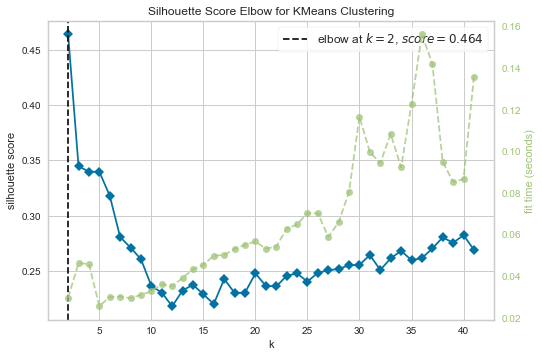

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [72]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,42),metric='silhouette', timings= True)
visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [50]:
trace = go.Scatter3d(x=df_with_shape_column['cluster'],
                    y=df_with_shape_column['Shape'],
                    z=df_with_shape_column['Final score'],
                    marker=dict(color=markercolor,
                                opacity=1,
                                reversescale=True,
                                colorscale='rainbow',
                                size=5),
                    line=dict (width=0.05),
                    mode='markers')

data = [trace]

layout = go.Layout( title = 'Clusters',
                        scene=dict(xaxis=dict( title="cluster"),
                                yaxis=dict( title="Shape"),
                                zaxis=dict(title="Final score")),)

fig= go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

plt.show()